## Generate random variables

a) Generate 1000 independent samples from Normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$. Plot and visualize the data.

(Hint: Generate Gaussian samples from uniform random variables.)


In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from tqdm import tqdm

(1000,)


(array([ 11.,  20.,  83., 191., 279., 211., 134.,  57.,  11.,   3.]),
 array([-3.20316078, -2.52395398, -1.84474718, -1.16554037, -0.48633357,
         0.19287323,  0.87208004,  1.55128684,  2.23049364,  2.90970045,
         3.58890725]),
 <a list of 10 Patch objects>)

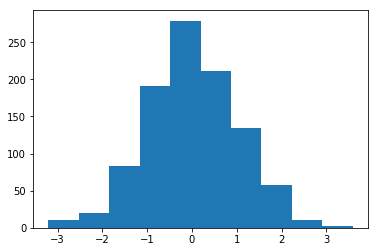

In [2]:
uniform_points = np.random.uniform(low = 0, high = 1, size = 1000)
print(uniform_points.shape)
gaussian_points = norm.ppf(uniform_points)
plt.hist(gaussian_points)

### Generate correlated random variables

b) Generate 1000 independent samples from Bivariate Normal distribution with means $\mu_{X} = \mu_{Y} = 0$, variances $\sigma_{X}^2 = \sigma_{Y}^2 = 1$ and correlation coefficient $\rho = - 0.9$. Plot and visualize the data in 2D and 3D.

(Hint: If (X,Y) is Bivariate Normal with $\mu_X = \mu_Y = 0$, $\sigma_X^2 = \sigma^2_Y = 1$ and correlation coefficient $\rho$, then the conditional distribution of $Y$ (conditioned on $X = x$) is Normal with mean $\rho x$ and variance $1 - \rho^2$, i.e., $Y|_{X = x} \sim {\mathcal N}(\rho x, 1 - \rho^2)$.)


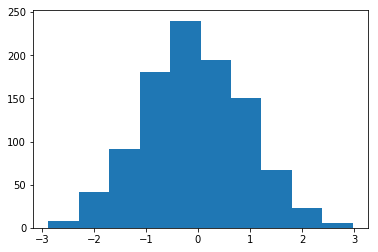

In [3]:
X = np.random.normal(size = 1000)
plt.hist(X)
x_points = []
y_points = []
z_points = []
cor = -0.9
for x in X:
    mean_x = cor*x
    std_x = np.sqrt((1 - cor*cor))
    Y = np.random.normal(mean_x, std_x,1)
    x_points.append(x)
    y_points.append(Y)

x_points_array = np.array(x_points)
y_points_array = np.array(y_points)
z_points_array = np.array(z_points)

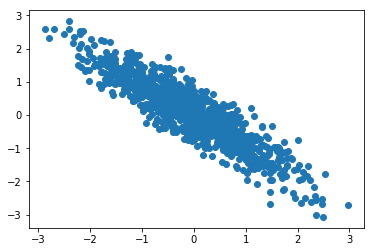

In [4]:
plt.scatter(x_points_array, y_points_array)

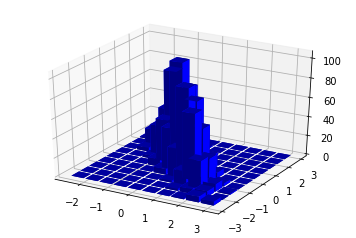

In [12]:
x_data = np.reshape(x_points_array, (1000))
y_data = np.reshape(y_points_array, (1000))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x_data, y_data)


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

## Estimate correlation coefficient

The file 'data_corr.csv' has 1000 independent samples from a Bivariate Normal distribution with means $\mu_X = \mu_Y = 0$, variances $\sigma_X^2 = \sigma_Y^2 = 1$ and unknown correlation coefficient $\rho$.

c) Load the data from the file 'data_corr.npz'. Plot and visualize the marginal and joint distributions of $X$ and $Y$.

d) Comment on the nature of correlation observed in the data.

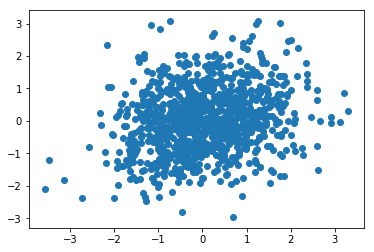

In [14]:
data = pd.read_csv('data_corr.csv')
plt.scatter(data.iloc[:,0], data.iloc[:,1])

In [6]:
margin_x = data['X'].unique()

(array([  3.,   5.,  51., 147., 232., 255., 182.,  96.,  23.,   6.]),
 array([-3.57765176, -2.88970712, -2.20176248, -1.51381784, -0.8258732 ,
        -0.13792855,  0.55001609,  1.23796073,  1.92590537,  2.61385001,
         3.30179465]),
 <a list of 10 Patch objects>)

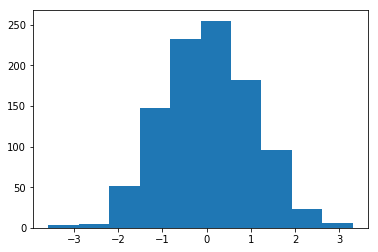

In [7]:
plt.hist(margin_x)

In [8]:
margin_y = data['Y '].unique()

(array([  5.,  24.,  85., 164., 242., 231., 146.,  68.,  24.,  11.]),
 array([-2.97623735, -2.36957362, -1.76290989, -1.15624616, -0.54958244,
         0.05708129,  0.66374502,  1.27040875,  1.87707248,  2.4837362 ,
         3.09039993]),
 <a list of 10 Patch objects>)

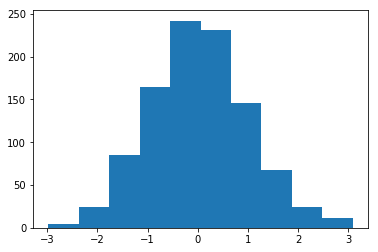

In [9]:
plt.hist(margin_y)

In [15]:
np.correlate(data.iloc[:,0], data.iloc[:,1])

array([229.4859052])

### Maximum Likelihood Estimate using Grid Search

e) Let ${\mathsf P}_{\rho}(\mathbf{X} = \mathbf{x}, \mathbf{Y} = \mathbf{y})$ denote the likelihood function (for the observation $(\mathbf{x}, \mathbf{y})$, as a function of the parameter $\rho$). Compute the likelihood function for the given data and find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using grid search.

(Hint: Plot ${\mathsf P}_{\rho}(\cdot,\cdot)$ as a function of $\rho$.)

In [17]:
sq_x = sum(data.iloc[:,0]**2)
sq_y = sum(data.iloc[:,1]**2)
mul_xy = sum(data.iloc[:,0]*data.iloc[:,1])
max_mlf = -999999999
mle_cor = 0
n = 1000
indices  = np.linspace(0,1,1000)
#print(indices)
for p in tqdm(indices):
    mlf = -0.5*n*np.log(1-p*p) + ((-1*(sq_x+sq_y) + 2*p*mul_xy)/(2*(1-p*p)))
    #print(p, mlf)
    if max_mlf < mlf:
        #print(row)
        max_mlf = mlf
        mle_cor = p

print(max_mlf)
print(mle_cor)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 1000/1000 [00:00<00:00, 77130.95it/s]


-973.4203811449481
0.22922922922922923


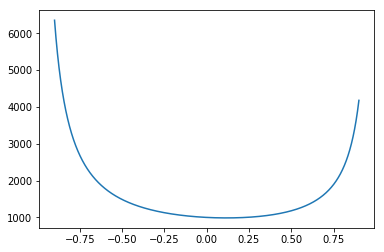

In [18]:
indices =np.linspace(-0.9,0.9, 10000)
mlf_values = []
for p in indices:
    mlf = -0.5*np.log(1-p*p) + ((-1*sq_x - sq_y + 2*p*mul_xy)/(2*(1-p*p)))
    mlf_values.append(-1*mlf)
plt.plot(indices, mlf_values)

### Maximum Likelihood Estimate using Gradient Descent

f) Find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using gradient descent. Plot the estimate of $\rho$ (versus iteration) for different choices of step size (e.g., 0.001, 0.01, 0.1).

In [42]:
def gradient_p(p, a, b, n):
    g_mlf = -1*n*(p*p*p - b*p*p + ((a/n) -1)*p - b)/((1-p*p)**2)
    return g_mlf


In [27]:
gradient_p(2.29291505e-01,(sq_x+sq_y), mul_xy/n, 1000)

-9.67494882498871e-08

In [6]:
print(mul_xy/n)

0.22948590519845624


0.22929150491755684


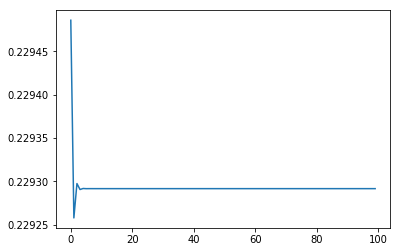

In [46]:
iterations = 100
step = 0.001
p_values = []
p = 0
n = 1000
for i in range(iterations):
    p = p + step*gradient_p(p, sq_x+sq_y, mul_xy/n, n)
    p_values.append(p)
    #print(gradient_p)
print(p)
plt.plot(p_values)

-320.7753051281754


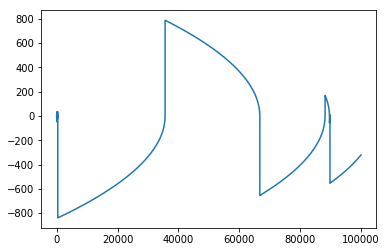

In [50]:
iterations = 100000
step = 0.01
p_values = []
p = 0
n = 1000
for i in range(iterations):
    p = p + step*gradient_p(p, sq_x+sq_y, mul_xy/n, n)
    p_values.append(p)
    #print(gradient_p)
print(p)
plt.plot(p_values)

113.9023487493945


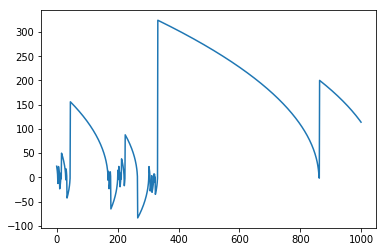

In [53]:
iterations = 1000
step = 0.1
p_values = []
p = 0
n = 1000
for i in range(iterations):
    p = p + step*gradient_p(p, sq_x+sq_y, mul_xy/n, n)
    p_values.append(p)
    #print(gradient_p)
print(p)
plt.plot(p_values)

The gradient descent doesnot converge for step values 0.01 and 0.1 

### Maximum Likelihood Estimate (Analysis)

g) Find the maximum likelihood estimate of $\rho, \hat{\rho}_{ML}$ analytically (from the likelihood function).

In [40]:
a = sq_x+sq_y
b = mul_xy/n

print(np.roots([1, -b, (a/n) - 1, -b]))

[9.72001404e-05+1.00042382j 9.72001404e-05-1.00042382j
 2.29291505e-01+0.j        ]


### Simple Linear Regression

h) Using linear regression, seek a relation between $Y$ and $X$ (i.e., express $Y$ as a linear function of $X$). Comment.

In [31]:
x = np.reshape(data.iloc[:,0].values, (1000,1))
y = np.reshape(data.iloc[:,1].values, (1000,1))

In [32]:
data_x = np.hstack((np.ones_like(x), x))

In [34]:
def linear_regression(x, y):
    b = np.matmul(np.transpose(x), x)
    c = np.matmul(np.linalg.inv(b), np.transpose(x))
    coeff = np.matmul(c, y)
    return coeff


[[0.02388922]
 [0.22209297]]


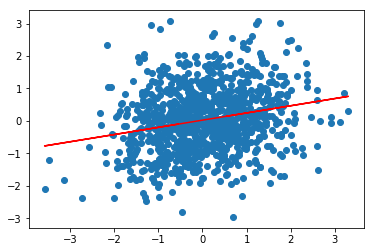

In [37]:
coeff = linear_regression(data_x, y)
prediction = coeff[1]*data.iloc[:,0] + coeff[0]
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.plot(data.iloc[:,0], prediction,  color = 'r')

- The line is the lest square error solution of the data.
- Linear line cannot be used to fit the plot values are spread out in all directions

## Polynomial Regression

Load the two dimensional data from the file 'data_poly1.npz'.

i) Plot the data and comment on the relation between $X$ and $Y$ (plot $Y$ as a function of $X$).

In [38]:
data1 = np.load('data_poly1.npz')
x = np.reshape(data1['x'], (10,1))
y = np.reshape(data1['y'], (10,1))

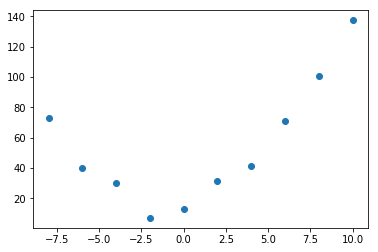

In [39]:
plt.scatter(x, y)

The scatter plot between x and y like parabolic curve with minimum between -2.5 and 0

### Polynomial Regression using Scikit-learn Libraries

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

In [70]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Degree 1 (Linear)

j) Using linear regression, seek a relation between $Y$ and $X$. Plot the function and report the mean square error.

mean squared error :  977.1734445909717


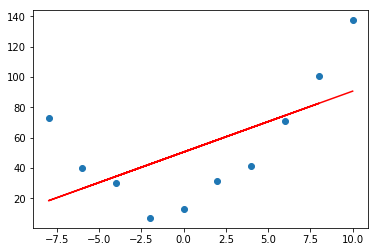

In [71]:
X = np.hstack((np.ones_like(x), x))
model = LinearRegression()
model.fit(X,y)
prediction = model.predict(X)
print('mean squared error : ',mean_squared_error(prediction,y))
plt.scatter(x, y)
plt.plot(x, prediction, 'r')

### Degree 2 (Quadratic)

k) Using polynomial regression of degree 2, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

In [74]:
poly = PolynomialFeatures(2)
data_x = poly.fit_transform(X)
data_x = np.unique(data_x, axis = 1)

mean square error:  24.846331727808185


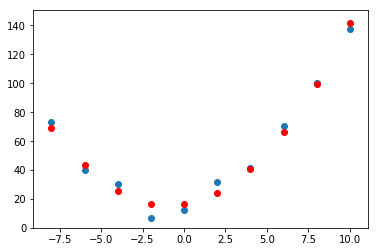

In [75]:
model2 = LinearRegression()
model2.fit(data_x, y)
prediction2 = model2.predict(data_x)
print('mean square error: ', mean_squared_error(prediction2, y))
plt.scatter(x, y)
plt.scatter(x, prediction2, c = 'r')

### Degree 9

l) Using polynomial regression of degree 9, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

mean square error:  2.983602608909425e-13


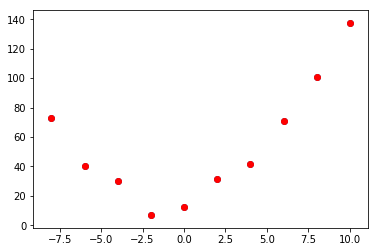

In [78]:
poly = PolynomialFeatures(9)
data_x = poly.fit_transform(X)
data_x = np.unique(data_x, axis = 1)

model3 = LinearRegression()
model3.fit(data_x, y)
prediction3 = model3.predict(data_x)
print('mean square error: ', mean_squared_error(prediction3, y))
plt.scatter(x, y)
plt.scatter(x, prediction3, c = 'r')

### Training Error

m) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data.

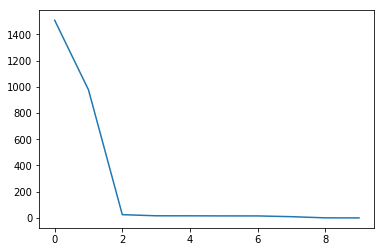

In [81]:
def polynomial_features(degree, data):
    poly = PolynomialFeatures(degree)
    data_x = poly.fit_transform(data)
    data_x = np.unique(data_x, axis = 1)
    return data_x

mse_error = []
for i in range(10):
    model = LinearRegression()
    data_x = polynomial_features(i, X)
    model.fit(data_x, y)
    prediction = model.predict(data_x)
    mse_error.append(mean_squared_error(prediction, y))

plt.plot(mse_error)    

### Test error

Load 'data_poly2.npz'. The data points in the file are from the same sample as 'data_poly1.npz'.

n) Plot the mean square error (for degrees 0,1,...,9) for the test data set, for the polynomial fit obtained with the training data set 'data_poly1.npz'. Now, comment on the best model for data.

(Hint: Plot Training error and Testing error in the same plot.)

In [83]:
test_data = np.load('data_poly2.npz')
test_x = np.reshape(test_data['x'], (10,1))
test_y = np.reshape(test_data['y'], (10,1))
test_x = np.hstack((np.ones_like(test_x), test_x))

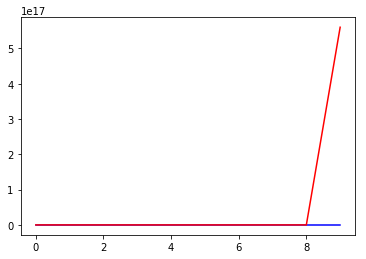

In [90]:
train_mse_error = []
test_mse_error = []
for i in range(10):
    model = LinearRegression()
    data_x = polynomial_features(i, X)
    model.fit(data_x, y)
    prediction = model.predict(data_x)
    test_data_x = polynomial_features(i, test_x)
    test_prediction = model.predict(test_data_x)
    train_mse_error.append(mean_squared_error(prediction, y))
    test_mse_error.append(mean_squared_error(test_prediction, test_y))

plt.plot(train_mse_error, 'b')
plt.plot(test_mse_error, 'r')

The test error increases rapidly for degree higher than 8 which clearly indicates overfitting of the data. Hence the optimum degree to use is 8.